In [18]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [29]:
from selenium import webdriver
import time

# Set up Selenium WebDriver 
driver = webdriver.Chrome() 

# URL for the category page
anal_url = "https://csn.cancer.org/categories/anal"
brain_url = "https://csn.cancer.org/categories/brain"
colorectal_url = "https://csn.cancer.org/categories/colorectal"
kidney_url = "https://csn.cancer.org/categories/kidney"
skin_url = "https://csn.cancer.org/categories/skin"

# Function to extract post URLs from the category page using Selenium
def get_post_urls_selenium(category_url):
    post_urls = []
    
    # Open the page with Selenium
    driver.get(category_url)
    
    # Wait for JavaScript to load content
    time.sleep(5)  # Adjust sleep time

    # Use BeautifulSoup to parse the fully rendered page HTML
    forum_text = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Find all <a> tags with the specific class name
    posts = forum_text.find_all('a', class_='css-1fztmce-ListItem-styles-titleLink-DiscussionList-classes-title')
    for post in posts[1:]:
        # Extract the href attribute
        post_url = post['href']
        
        # Ensure the URL is complete by adding the base URL if necessary
        if not post_url.startswith("https"):
            post_url = "https://csn.cancer.org" + post_url
        
        # Append each post URL to the list
        post_urls.append(post_url)
    
    return post_urls

#print list of post URLs
anal_post_urls = get_post_urls_selenium(anal_url)
brain_post_urls = get_post_urls_selenium(brain_url)
colorectal_post_urls = get_post_urls_selenium(colorectal_url)
kidney_post_urls = get_post_urls_selenium(kidney_url)
skin_post_urls = get_post_urls_selenium(skin_url)
#print(post_urls)  

# Close selenium driver
driver.quit()

In [27]:
# Function to scrape data from individual post pages
def scrape_post_data(post_url):
    response = requests.get(post_url)
    forum_post = BeautifulSoup(response.text, 'html.parser')
    
    # Extract post details
    title = forum_post.find('div', id='Item_0', class_='PageTitle pageHeadingBox isLarge').find('h1').text.strip()
    author = forum_post.find('a', class_='Username js-userCard').text.strip()
    date = forum_post.find('span', class_='MItem DateCreated').find('time')['datetime']
    content = forum_post.find('div', class_='Message userContent').text.strip()  # Replace with actual class or ta
    
    return {"Title": title, "Author": author, "Date": date, "Content": content}

#Function to produce data

def get_post_data(post_urls):
    data=[]
    for url in post_urls:
        try:
            post_data = scrape_post_data(url)
            data.append(post_data)
            #print(f"Scraped data from {url}")
            time.sleep(1)  # Pause to avoid overwhelming the server
        except Exception as e:
            print(f"Error scraping {url}: {e}")
    return data 
    


In [33]:
anal_post_data = get_post_data(anal_post_urls) 
anal_df = pd.DataFrame(anal_post_data)
anal_df.to_csv("C:/Users/etsai/OneDrive/Data Science Portfolio/Webscraping Project/anal_forum_posts.csv", index=False)

brain_post_data = get_post_data(brain_post_urls)
brain_df = pd.DataFrame(brain_post_data)
brain_df.to_csv("C:/Users/etsai/OneDrive/Data Science Portfolio/Webscraping Project/brain_forum_posts.csv", index=False)

colorectal_post_data = get_post_data(colorectal_post_urls)
colorectal_df = pd.DataFrame(colorectal_post_data)
colorectal_df.to_csv("C:/Users/etsai/OneDrive/Data Science Portfolio/Webscraping Project/colorectal_forum_posts.csv", index=False)

kidney_post_data = get_post_data(kidney_post_urls)
kidney_df = pd.DataFrame(kidney_post_data)
kidney_df.to_csv("C:/Users/etsai/OneDrive/Data Science Portfolio/Webscraping Project/kidney_forum_posts.csv", index=False)

skin_post_data = get_post_data(skin_post_urls)
skin_df = pd.DataFrame(skin_post_data)
skin_df.to_csv("C:/Users/etsai/OneDrive/Data Science Portfolio/Webscraping Project/skin_forum_posts.csv", index=False)


In [32]:
anal_df = pd.DataFrame(anal_post_data)

pd.options.display.max_rows = 10

# Display the DataFrame
anal_df

,Title,Author,Date,Content
0,Leg/Hip weakness/stiffness,dawn7767,2024-02-27T01:14:27+00:00,I am 15 year post anal cancer. The last few y...
1,Chemo/Radiation Long Term Side Effects,dawn7767,2019-05-30T20:08:30+00:00,I am now about 10 years post treatments. Afte...
2,CT scan,Cheryl59,2024-10-20T22:45:15+00:00,"I saw my Oncologist a year ago, he congratulat..."
3,Marijuana for pain?,goji,2024-01-29T20:07:25+00:00,"Has anyone had success with marijuana, gummies..."
4,Proton beam therapy for anal cancer,hamservice,2024-10-18T14:13:10+00:00,Does anyone have experience with proton beam t...
...,...,...,...,...
25,Wake Forest or Atrium Health Levine in Charlotte,EmilySB,2024-01-22T12:46:24+00:00,I am exploring my options for a 2nd opinion or...
26,Scans after Radiation and Chemo,Tamt,2023-11-29T17:34:39+00:00,Hi everyone I’m new here and I’m just looking ...
27,Pros and Cons of traveling far away for treatment,EmilySB,2024-01-17T20:23:16+00:00,Hi -I don't have an official anal cancer dx ye...
28,Newly diagnosed with anal cancer,lge,2023-12-07T22:18:07+00:00,I went in for hemorrhoids to be removed and wa...


In [34]:
#add cancer type column to all data
anal_df['Cancer_Type'] = 'anal'
brain_df['Cancer_Type'] = 'brain'
colorectal_df['Cancer_Type'] = 'colorectal'
kidney_df['Cancer_Type'] = 'kidney'
skin_df['Cancer_Type'] = 'skin'

# Combine all DataFrames into one
allcancerdata = pd.concat([anal_df, brain_df, colorectal_df, kidney_df, skin_df], ignore_index=True)


In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#initializes analyzer 
analyzer = SentimentIntensityAnalyzer()

# function to calculate sentiment
def get_vader_sentiment(content):
    scores = analyzer.polarity_scores(content)
    return scores['compound']

# apply sentiment analysis to data
allcancerdata['Sentiment'] = allcancerdata['Content'].apply(get_vader_sentiment)

# classify sentiment into categories
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

allcancerdata['Sentiment_Category'] = allcancerdata['Sentiment'].apply(classify_sentiment)


Sentiment Category Counts by Cancer Type:
Sentiment_Category  Negative  Neutral  Positive
Cancer_Type                                    
anal                      17        2        11
brain                     15        2        13
colorectal                17        0        13
kidney                    15        2        13
skin                      14        5        11


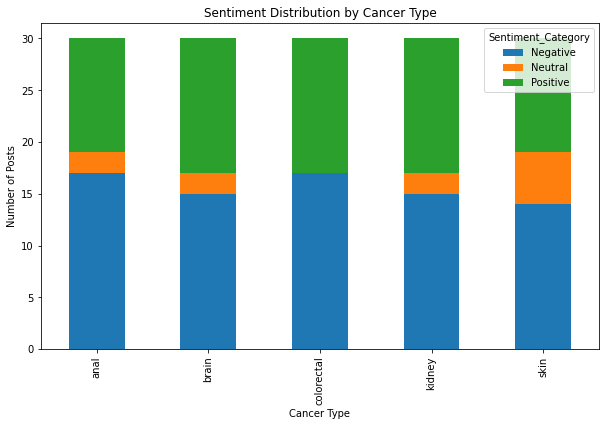

In [39]:
import matplotlib.pyplot as plt
# Count the number of positive, neutral, and negative posts by cancer type
sentiment_counts = allcancerdata.groupby(['Cancer_Type', 'Sentiment_Category']).size().unstack(fill_value=0)
print("Sentiment Category Counts by Cancer Type:")
print(sentiment_counts)

# Bar plot of sentiment category distribution
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Number of Posts")
plt.show()

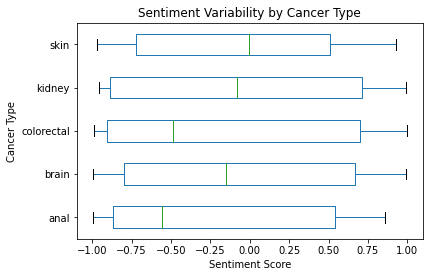

                max     min      mean  variability
Cancer_Type                                       
anal         0.8607 -0.9956 -0.231163     0.709760
brain        0.9886 -0.9967 -0.091260     0.725793
colorectal   0.9966 -0.9853 -0.142827     0.790244
kidney       0.9907 -0.9577 -0.068680     0.782541
skin         0.9266 -0.9707 -0.077690     0.630884


In [45]:
#sentiment variability by cancer type
allcancerdata.boxplot(column='Sentiment', by='Cancer_Type', grid=False, vert=False)
plt.title("Sentiment Variability by Cancer Type")
# Remove the default "Boxplot grouped by" title
plt.suptitle("")
plt.xlabel("Sentiment Score")
plt.ylabel("Cancer Type")
plt.show()


stats = allcancerdata.groupby('Cancer_Type')['Sentiment'].agg(['max', 'min', 'mean', 'std'])
stats.rename(columns={'std': 'variability'}, inplace=True)
print(stats)


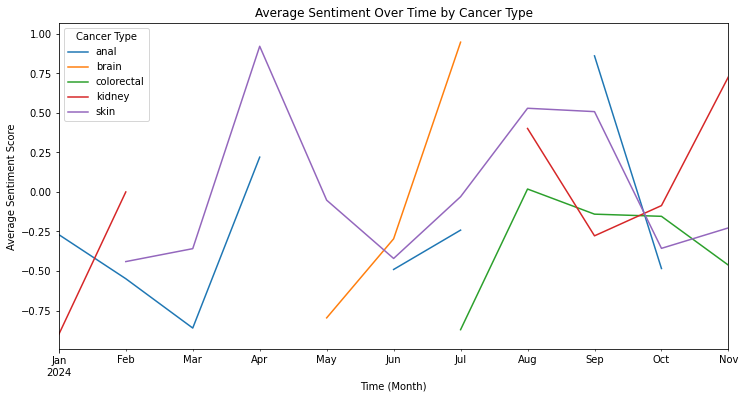

In [43]:
# convert date column to datetime format and filter to 2024
allcancerdata['Date'] = pd.to_datetime(allcancerdata['Date'])
allcancerdata_2024= allcancerdata[allcancerdata['Date'].dt.year == 2024]

# group by cancer type and month
sentiment_over_time = allcancerdata_2024.groupby([pd.Grouper(key='Date', freq='M'), 'Cancer_Type'])['Sentiment'].mean().unstack()

# plot sentiment trends over time
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title("Average Sentiment Over Time by Cancer Type")
plt.xlabel("Time (Month)")
plt.ylabel("Average Sentiment Score")
plt.legend(title="Cancer Type")
plt.show()
